# Milestone 1 Phase 2 - Telecomunication Customer Churn Prediction

______________________

# I. Introduction

> - Nama : Nirwan Arrachman  
> - Batch : FTDS 11  

Notebook ini bertujuan untuk membuat sebuah model deep learning neural network yang bertujuan untuk memprediksi customer churn suatu perusahaan telekomunikasi. Dataset yang digunakan adalah dataset yang tersedia di website Kaggle dengan link sebagai berikut:  
> `https://www.kaggle.com/datasets/blastchar/telco-customer-churn`  
  
  
Dataset ini berisi informasi mengenai customer sebuah perusahaan telekomunikasi dengan karakteristik masing-masing customer tersebut dan hasil apakah customer tersebut churn atau tidak. Churn adalah suatu kondisi sebuah perusahaan kehilangan pelanggan atau customernya. Churn rate artinya ukuran mengenai seberapa banyak customer perusahaan yang pergi atau tidak menggunakan produk/ jasa perusahaan. Churn rate ini sangat mempengaruhi performa bisnis perusahaan, semakin besar churn rate maka semakin sedikit customer yang loyal terhadap perusahaan sehingga pendapatan yang diterima perusahaan akan berkurang.

Pihak perusahaan ingin mendeteksi customer yang akan churn sedini mungkin sehingga perusahaan dapat melakukan tindakan cepat untuk mencegah customer tersebut churn. Prediksi churn customer ini juga dapat dimanfaatkan untuk membuat customer retention programs agar tingkat churn rate dapat ditekan dan perusahaan bisa menjaga loyalitas customernya. Model machine learning dengan deep learning dapat melakukan prediksi churn seorang customer dengan menggunakan dataset ini. Dataset ini terdiri dari 7.043 baris data dan 21 kolom data. Penjelasan mengenai 21 kolom dataset ini adalah sebagai berikut:
- `customerID` : Unique ID of each customer
- `gender` : Whether the customer is a male or a female
- `SeniorCitizen` : Whether the customer is a senior citizen or not (1, 0)
- `Partner` : Whether the customer has a partner or not (Yes, No)
- `Dependents` : Whether the customer has dependents or not (Yes, No)
- `tenure` : Number of months the customer has stayed with the company
- `PhoneService` : Whether the customer has a phone service or not (Yes, No)
- `MultipleLines` : Whether the customer has multiple lines or not (Yes, No, No phone service)
- `InternetService` : Customer’s internet service provider (DSL, Fiber optic, No)
- `OnlineSecurity` : Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup` : Whether the customer has online backup or not (Yes, No, No internet service)
- `DeviceProtection` : Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport` : Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV` : Whether the customer has streaming TV or not (Yes, No, No internet service)
- `StreamingMovies` : Whether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract` : The contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)
- `PaymentMethod` : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharge` : The amount charged to the customer monthly
- `TotalCharges` : The total amount charged to the customer
- `Churn` : Whether the customer is left or not within last month (Yes, No)

Berdasarkan informasi dataset ini, saya akan membuat model deep learning neural network untuk memprediksi label yaitu `Churn`. Model ini akan dideploy ke website sehingga divisi terkait dapat melalukan customer churn analysis secara real-time. Hasil real-time tersebut diharapkan dapat menjadi tindak cepat perusahaan untuk mencegah customer tersebut churn.

>Objective dari pengerjaan notebook ini adalah sebagai berikut:  
>1. Melakukan EDA untuk mendapatkan insight dari dataset yang digunakan
>2. Membuat model machine learning deep learning yang dapat memprediksi customer churn
>3. Mendeploy model kedalam website heroku.app
>4. Melakukan model inference pada data inference

______________________________

# II. Import Libraries

Library yang akan digunakan dalam notebook ini adalah pandas, numpy, matplotlib, seaborn, sklearn, imblearn, pickle, dan tensorflow.

In [1]:
# import library umum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# model
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras

# metrics
from sklearn.metrics import classification_report

# Model Saving
import pickle

In [2]:
# opsi pada pandas untuk melihat kolom data secara keseluruhan
pd.options.display.max_columns = None

In [3]:
# code untuk menghilangkan warning
from warnings import filterwarnings
filterwarnings('ignore')

_______________________

# III. Data Loading

In [4]:
# loading dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
# preview 5 baris data pertama
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# preview 5 baris data terakhir
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# ukuran dimensi dataset
df.shape

(7043, 21)

Dataset terdiri dari 7.043 baris data dan 21 kolom data.

In [8]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terlihat dari hasil informasi dataset diatas, dataset ini tidak memiliki missing values, namun terdapat beberapa kolom yang memiliki tipe data yang salah yaitu kolom `SeniorCitizen` dan `TotalCharges`.

### Columns Manipulation

Kolom `SeniorCitizen` dan `TotalCharges` akan diubah tipe datanya agar lebih sesuai.

In [9]:
# ubah tipe data kolom menjadi object
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1 : 'Yes', 0 : 'No'})

In [10]:
# ubah tipe data kolom mnejadi float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
# pengecekan kembali apakah tipe data berhasil diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Kolom `SeniorCitizen` dan `TotalCharges` telah berhasil diubah tipe datanya, namun pada kolom `TotalCharges` terdapat 11 baris data missing values. Karena jumlahnya yang hanya sedikit, maka missing values ini akan didrop.

In [12]:
# drop missing values
df.dropna(inplace=True)

In [13]:
# pengecekan ulang missing values
df.isnull().sum().sum()

0

Dataset ini sudah tidak memiliki missing values

### Cek Data Duplikat

Pengecekan data duplikat dilakukan untuk melihat apakah terdapat baris data yang sama persis valuenya dengan baris data lain. Pengecekan ini dilakukan untuk mengurangi anomali data.

In [14]:
# pengecekan duplikat data
df.duplicated().sum()

0

Dataset ini tidak memiliki duplikat data.

### Checking Categorical Value

Pengecekan value data kategorik dilakukan untuk melihat apakah terdapat value data kategorikal yang tidak terdefinisi atau dapat digabungkan menjadi satu kesatuan dengan kelas lainnya.

In [15]:
# list data kategorik dan numerik
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [16]:
# looping untuk melihat value data kategorik
for i in (cat_cols[1:]): 
    print(f'Unique kolom {i} :', df[i].unique())

Unique kolom gender : ['Female' 'Male']
Unique kolom SeniorCitizen : ['No' 'Yes']
Unique kolom Partner : ['Yes' 'No']
Unique kolom Dependents : ['No' 'Yes']
Unique kolom PhoneService : ['No' 'Yes']
Unique kolom MultipleLines : ['No phone service' 'No' 'Yes']
Unique kolom InternetService : ['DSL' 'Fiber optic' 'No']
Unique kolom OnlineSecurity : ['No' 'Yes' 'No internet service']
Unique kolom OnlineBackup : ['Yes' 'No' 'No internet service']
Unique kolom DeviceProtection : ['No' 'Yes' 'No internet service']
Unique kolom TechSupport : ['No' 'Yes' 'No internet service']
Unique kolom StreamingTV : ['No' 'Yes' 'No internet service']
Unique kolom StreamingMovies : ['No' 'Yes' 'No internet service']
Unique kolom Contract : ['Month-to-month' 'One year' 'Two year']
Unique kolom PaperlessBilling : ['Yes' 'No']
Unique kolom PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique kolom Churn : ['No' 'Yes']


Hasil value data kategorik diatas menunjukan bahwa seluruh value kategorik telah terdefinisi dengan baik dan tidak ada value kategorik yang dapat digabung menjadi satu.

_________________

# IV. Exploratory Data Analysis (EDA)

Proses EDA ini saya akan melakukan eksplorasi pada beberapa bagian untuk mendapatkan insight dari dataset telco ini. Berikut adalah bagian-bagian dari EDA yang akan saya lakukan:

1. Cek Distribusi Data Numerik  
2. Proporsi Kolom `Churn`  
3. Proporsi Customer Churn Berdasarkan Jenis Internet Service
4. Karakteristik Customer Churn dan Customer Tidak Churn

### 1. Distribusi Data Numerik

Pengecekan distribusi data numerik dilakukan untuk melihat persebaran data numerik. Persebaran data numerik ini akan menentukan metode proses data preprocessing yang akan dilakukan.

In [17]:
# membuat fungsi untuk distribusi data menggunakan histogram dan boxplot
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print('Skewness :', df[col].skew())
    if -0.5 <= df[col].skew() <= 0.5:
        print("Kolom '{}' berdistribusi normal".format(col))
    elif df[col].skew() > 0.5:
        print("Kolom '{}' right skewed (miring ke kanan)".format(col))
    elif df[col].skew() < -0.5:
        print("Kolom '{}' left skewed (miring ke kiri)".format(col))

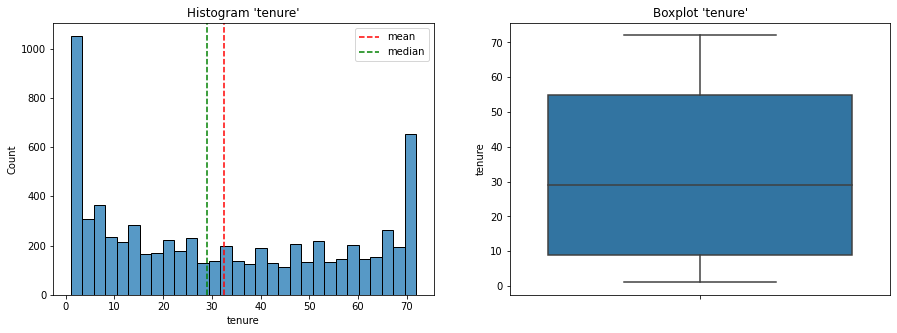

Skewness : 0.23773083190513133
Kolom 'tenure' berdistribusi normal


In [18]:
# fungsi visualisasi distribusi data pada kolom `tenure`
plot_dist(df, 'tenure')

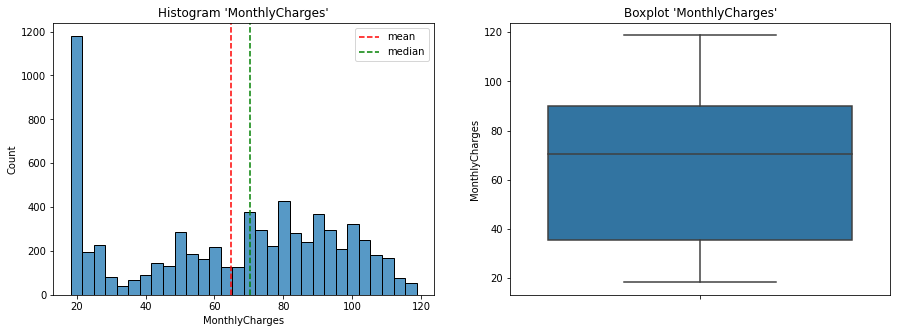

Skewness : -0.22210292770166232
Kolom 'MonthlyCharges' berdistribusi normal


In [19]:
# fungsi visualisasi distribusi data pada kolom `MonthlyCharges`
plot_dist(df, 'MonthlyCharges')

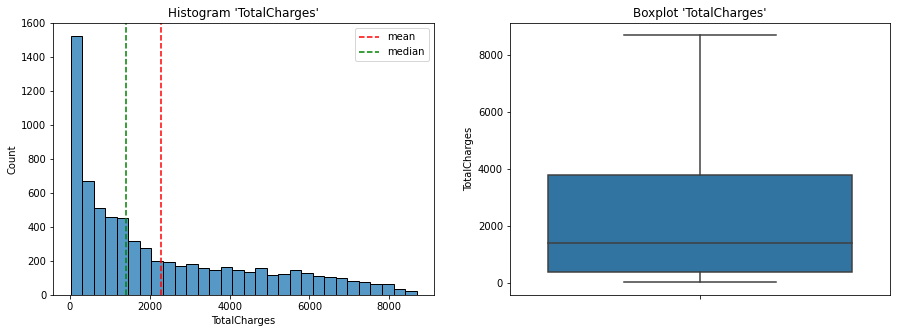

Skewness : 0.9616424997242504
Kolom 'TotalCharges' right skewed (miring ke kanan)


In [20]:
# fungsi visualisasi distribusi data pada kolom `TotalCharges`
plot_dist(df, 'TotalCharges')

Terlihat dari beberapa grafik histogram dan boxplot diatas, bahwa distribusi data numerik pada kolom `tenure` dan `MonthlyCharges` memiliki persebaran data yang berdistribusi normal, sedangkan pada kolom `TotalCharges` persebaran datanya miring ke kanan. Karena terdapat 1 kolom yang tidak terdistribusi normal, maka saya akan menggunakan metode scaling Robust Scaler pada data preprocessing.

### 2. Proporsi Kolom `Churn`

Pada bagian EDA ini, kolom Churn atau yang dapat dikatakan sebagai label ini akan menentukan prediksi model. Melakukan pengecekan proporsi label ini adalah untuk melihat gambaran mengenai customer churn pada perusahaan telco ini.

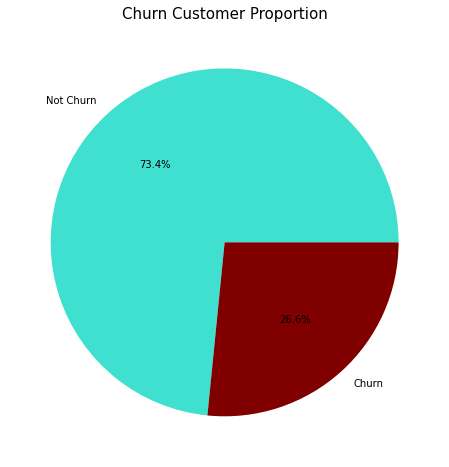

In [21]:
# visualiasai pie chart 'Churn'
df['Churn'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8),labels = ['Not Churn', 'Churn'], colors = ['turquoise', 'maroon'])
plt.title('Churn Customer Proportion', size = 15)
plt.ylabel('')
plt.show()

Proporsi label Churn diatas menunjukan bahwa Churn rate pada dataset ini adalah 26,6%. Angka churn rate ini dapat kita tekan jika terdapat sebuah model machine learning yang dapat memprediksi customer churn sedini mungkin, sehingga customer tersebut dapat bertahan dan loyal terhadap perusahaan karena tim atau divisi terkait dapat melakukan tindakan yang terukur untuk mencegah customer tersebut churn. Sebuah website apps akan menjadi sesuatu yang sangat berguna karena tim terkait dapat langsung memantau customer secara real-time.

### 3. Proporsi Customer Churn Berdasarkan Jenis Internet Service

EDA ini akan fokus untuk melihat proporsi customer churn berdasarkan jenis internet service. Hal ini dapat menjadi masukan untuk tim marketing dan sales guna melihat jenis internet service seperti apa yang memiliki jumlah customer churn yang paling banyak. Insight ini dapat dijadikan sebagai landasan dalam membuat customer retention program dengan memfokuskan pada jenis internet service tertentu yang memiliki jumlah customer churn paling banyak.

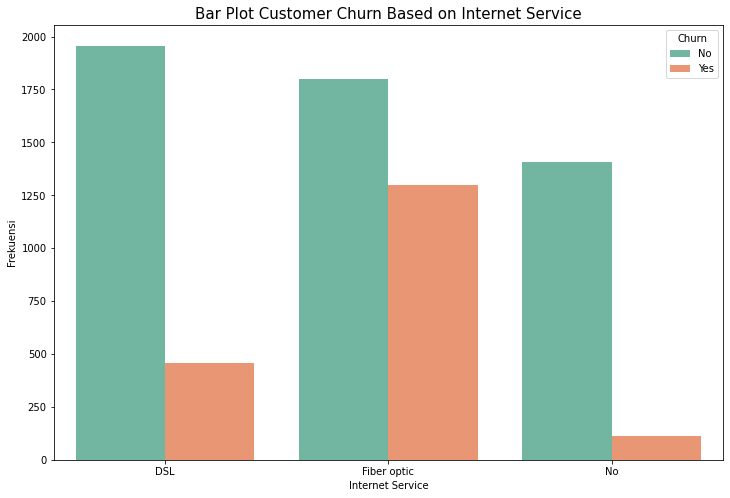

In [22]:
# visualisasi bar plot customer churn
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = 'InternetService', hue = 'Churn', palette = 'Set2')
plt.title('Bar Plot Customer Churn Based on Internet Service', size = 15)
plt.xlabel('Internet Service')
plt.ylabel('Frekuensi')
plt.show()

Hasil barplot diatas menunjukan bahwa Fiber Optic merupakan jenis internet service yang paling banyak memiliki customer churn. Hal ini dapat menjadi fokus tim terkait untuk melakukan analisa mengenai performa jenis internet service tersebut dan meningkatkan performa pelayanan bagi customer yang memilih Fiber Optic agar tidak mudah churn dikemudian hari.

### 4. Karakteristik Customer Churn dan Customer Tidak Churn

EDA ini akan melihat beberapa karakteristik churn dan customer tidak churn sehingga perusahaan memiliki sistem peringatan awal mengenai customer yang cenderung akan churn dikemudian hari.

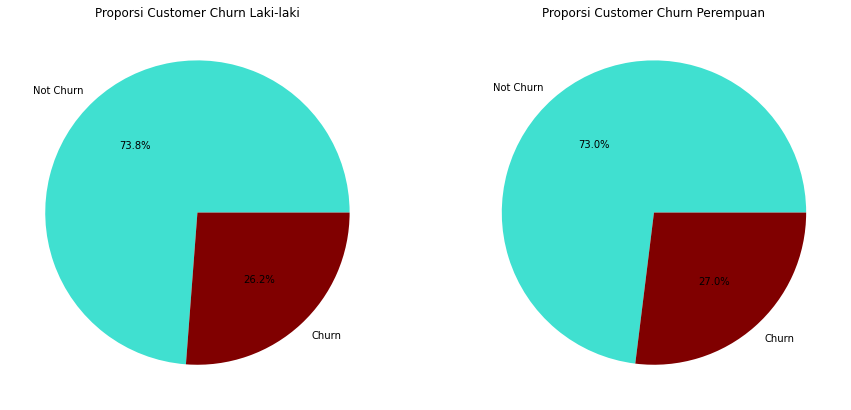

In [23]:
# proporsi customer churn laki-laki dan perempuan
fig, ax = plt.subplots(ncols=2, figsize=(15,8))

df[df['gender'] == 'Male']['Churn'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', labels = ['Not Churn', 'Churn'], colors = ['turquoise', 'maroon'], ax=ax[0])
ax[0].set_title('Proporsi Customer Churn Laki-laki', size = 12)
ax[0].set_ylabel('')

df[df['gender'] == 'Female']['Churn'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', labels = ['Not Churn', 'Churn'], colors = ['turquoise', 'maroon'] ,ax=ax[1])
ax[1].set_title('Proporsi Customer Churn Perempuan', size = 12)
ax[1].set_ylabel('')
plt.show()

Dua pie chart diatas menunjukan bahwa tidak perbedaan jenis kelamin dalam menentukan kecenderungan customer tersebut churn atau tidak churn.

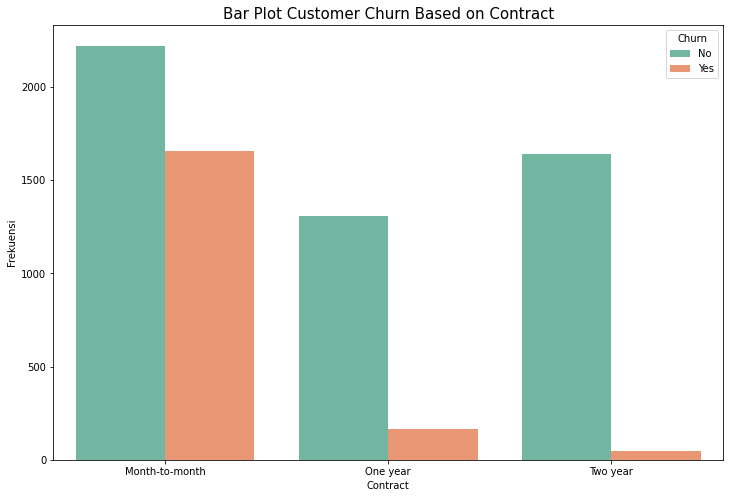

In [24]:
# visualisasi bar plot customer churn
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = 'Contract', hue = 'Churn', palette = 'Set2')
plt.title('Bar Plot Customer Churn Based on Contract', size = 15)
plt.xlabel('Contract')
plt.ylabel('Frekuensi')
plt.show()

Hasil barplot diatas menunjukan bahwa customer dengan kontrak perbulan memiliki jumlah customer churn terbanyak diantara jenis kontrak lainnya. Hal ini cukup wajar karena customer dengan kontrak perbulan hanya memiliki masa berlangganan yang lebih cepat dibandingkan dengan kontrak 1 tahun dan 2 tahun. Hal ini dapat dijadikan sebagai insight untuk melakukan promosi dan ajakan kepada customer yang memiliki kontrak perbulan untuk berpindah menjadi customer dengan kontrak tahunan. Hal ini tentunya dapat mengurangi churn rate customer.

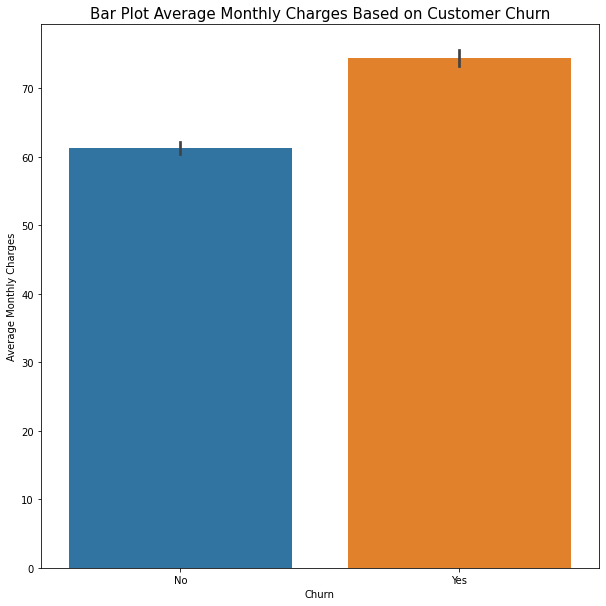

In [25]:
# visualisasi bar plot customer churn
plt.figure(figsize = (10,10))
sns.barplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Bar Plot Average Monthly Charges Based on Customer Churn', size = 15)
plt.ylabel('Average Monthly Charges')
plt.show()

In [26]:
# nilai rata-rata monthly charges
print('Rata-rata Jumlah Tagihan pada customer yang CHURN \t:', np.round(df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()))
print('Rata-rata Jumlah Tagihan pada customer yang TIDAK CHURN :', np.round(df[df['Churn'] == 'No']['MonthlyCharges'].mean()))

Rata-rata Jumlah Tagihan pada customer yang CHURN 	: 74.0
Rata-rata Jumlah Tagihan pada customer yang TIDAK CHURN : 61.0


Hasil eksplorasi diatas menunjukan bahwa customer churn memiliki rata-rata jumlah tagihan perbulan lebih besar daripada customer yang tidak churn. Hal ini dapat dijadikan sebagai langkah pencegahan dengan mengurangi jumlah tagihan perbulan customer yang terprediksi akan churn. Diharapkan customer tersebut akan memikirkan kembali keputusannya untuk churn karena mendapatkan benefit yang diberikan oleh perusahaan dengan adanya pengurangan jumlah tagihan perbulan.

Dari hasil EDA, kita dapat mengetahui beberapa karakteristik customer yang akan churn yaitu sebagai berikut:
1. Customer churn cenderung memiliki tipe internet service yaitu Fiber Optic
2. Customer churn cenderung memiliki kontrak pembayaran perbulan
3. Customer churn cenderung memiliki jumlah tagihan yang lebih tinggi dibandingkan dengan customer yang tidak churn

________________________________________

# V. Data Preprocessing

### Split Data Inference

Untuk melakukan model inference, saya akan memisahkan 10 data sampel dari dataset awal yang selanjutnya akan disimpan dalam variabel baru bernama `df_inf`.

In [27]:
# split data inference dari dataset awal
df_inf = df.sample(10, random_state = 7)
df_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2411,6901-GOGZG,Male,No,No,Yes,60,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,4984.85,No
5118,7621-VPNET,Female,No,Yes,No,42,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),85.90,3729.75,No
5724,8042-JVNFH,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.35,71.35,Yes
4774,7402-PWYJJ,Female,No,Yes,No,53,Yes,Yes,Fiber optic,No,No,No,Yes,No,Yes,One year,Yes,Electronic check,91.15,4862.50,No
1877,7873-CVMAW,Male,No,No,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.55,6362.35,No
131,6207-WIOLX,Female,No,Yes,Yes,25,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,Yes
5631,6542-LWGXJ,Male,No,Yes,No,3,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.00,78.25,No
4028,5574-NXZIU,Male,No,No,No,63,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),109.20,7049.75,No
5588,1660-HSOOQ,Male,No,No,No,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.65,49.65,Yes
3013,2065-MMKGR,Female,No,No,No,29,Yes,Yes,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),71.00,2080.10,No


In [28]:
# cek proporsi label pada data inference
df_inf['Churn'].value_counts()

No     7
Yes    3
Name: Churn, dtype: int64

Proporsi label `Churn` pada data inference adalah 3 data customer yang churn, dan 7 data customer yang tidak churn. Proporsi label ini sudah cukup baik untuk dapat dijadikan sebagai data inference.

Data inference yang sudah dipisahkan lalu didrop index datanya pada dataset untuk training model agar model tidak mengalami kebocoran data karena model telah mempelajari data inference tersebut terlebih dahulu.

In [29]:
# drop index data inference pada data untuk train-val-test set
df_trainval_test = df.drop(df_inf.index)

Selanjutnya saya melakukan reset index agar penomoran data kembali sesuai urutannya pada masing-masing variabel dataset.

In [30]:
# reset index
df_trainval_test.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)

### Split Label (y) dan Fitur (X)

Label adalah variabel yang ingin diprediksi, yaitu kolom `Churn` dengan ketentuan nilai 1 adalah Churn dan nilai 0 adalah tidak churn. Fitur adalah kolom-kolom yang akan dijadikan sebagai variabel penentu dalam memprediksi label Churn.

In [31]:
# split label dan fitur
X = df_trainval_test.drop(['customerID', 'Churn'], axis = 1)
y = df_trainval_test['Churn'].map({'Yes': 1, 'No': 0})

In [32]:
print('Ukuran dimensi fitur: ', X.shape)
print('Ukuran dimensi label: ', y.shape)

Ukuran dimensi fitur:  (7022, 19)
Ukuran dimensi label:  (7022,)


Fitur yang dipilih adalah 19 fitur dengan 7.022 baris data.

### Manipulasi Kolom Kategorik

Dalam dataset ini, terdapat beberapa jenis kolom kategorik yaitu kolom kategorik binary dan kolom kategorik multiclass. Kolom kategorik binary akan diubah nilainya menjadi binary number dengan nilai 1 : 'Yes', dan 0 : 'No'. Sedangkan kolom kategorik multiclass akan dilakukan encoding dengan menggunakan One Hot Encoder untuk mewakili setiap nilai class yang ada.

Berikut adalah kolom kategorik binary : 
- `SeniorCitizen`
- `Partner`
- `Dependents`
- `PhoneService`
- `PaperlessBilling`

In [33]:
# list nama kolom kategorik multiclass
cat_cols_nom = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# list nama kolom kategorik binary
cat_cols_bin = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [34]:
# ubah value pada kolom kategorik binary menjadi 0 dan 1
X[cat_cols_bin] = X[cat_cols_bin].replace({'Yes': 1, 'No': 0})

### Split Data Trainval-set dan Test-set

Split data antara data trainval-set dan data test-set dengan perbandingan 80% data trainval-set, dan 20% data test-set.

In [35]:
# split data trainval-set dan test-set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print('Ukuran dimensi Data Trainval-set: ', X_trainval.shape)
print('Ukuran dimensi Data Test-set: ', X_test.shape)

Ukuran dimensi Data Trainval-set:  (5617, 19)
Ukuran dimensi Data Test-set:  (1405, 19)


In [36]:
# Cek proporsi label pada data trainval-set dan test-set
print('Proporsi label pada Data Trainval-set: \n', y_trainval.value_counts())
print('Proporsi label pada Data Test-set: \n', y_test.value_counts())

Proporsi label pada Data Trainval-set: 
 0    4118
1    1499
Name: Churn, dtype: int64
Proporsi label pada Data Test-set: 
 0    1038
1     367
Name: Churn, dtype: int64


### Split Data Train-set dan Val-set

Split data antara data train-set dan data val-set dengan perbandingan 80% data train-set, dan 20% data val-set.

In [37]:
# split data train-set dan val-set
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.2, random_state = 10)

print('Ukuran dimensi Data Trainval-set: ', X_train.shape)
print('Ukuran dimensi Data Test-set: ', X_val.shape)

Ukuran dimensi Data Trainval-set:  (4493, 19)
Ukuran dimensi Data Test-set:  (1124, 19)


In [38]:
# Cek proporsi label pada data train-set dan val-set
print('Proporsi label pada Data Trainval-set: \n', y_train.value_counts())
print('Proporsi label pada Data Test-set: \n', y_val.value_counts())

Proporsi label pada Data Trainval-set: 
 0    3295
1    1198
Name: Churn, dtype: int64
Proporsi label pada Data Test-set: 
 0    823
1    301
Name: Churn, dtype: int64


### Pipeline (Column Transformer)

Pipeline digunakan untuk membantu proses data preprocessing menjadi lebih ringkas dan cepat.

In [39]:
# list data numerik dan kategorik
print('Data Numerik :', num_cols)
print('Data Kategorik Nominal:', cat_cols_nom)
print('Data Kategorik Binary:', cat_cols_bin)

Data Numerik : ['tenure', 'MonthlyCharges', 'TotalCharges']
Data Kategorik Nominal: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Data Kategorik Binary: ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


Data numerik akan dilakukan scaling menggunakan Robust Scaler, sedangkan data kategorik multiclass (nominal) akan dilakukan encoding dengan menggunakan One Hot Encoder, data kategorik binary karena sebelumnya telah diubah menjadi nilai binary maka akan dibiarkan.

In [40]:
# pipeline
full_pipeline = ColumnTransformer([
                ('scaler', RobustScaler(), num_cols),
                ('ohe', OneHotEncoder(), cat_cols_nom)
                ], remainder = 'passthrough')

In [41]:
# fit transform pipeline pada data-set
X_train_final = full_pipeline.fit_transform(X_train)
X_val_final = full_pipeline.transform(X_val)
X_test_final = full_pipeline.transform(X_test)

In [42]:
# features name hasil one hot encoder
ohe_features = full_pipeline.named_transformers_['ohe'].get_feature_names()
ohe_features

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_No phone service', 'x1_Yes',
       'x2_DSL', 'x2_Fiber optic', 'x2_No', 'x3_No',
       'x3_No internet service', 'x3_Yes', 'x4_No',
       'x4_No internet service', 'x4_Yes', 'x5_No',
       'x5_No internet service', 'x5_Yes', 'x6_No',
       'x6_No internet service', 'x6_Yes', 'x7_No',
       'x7_No internet service', 'x7_Yes', 'x8_No',
       'x8_No internet service', 'x8_Yes', 'x9_Month-to-month',
       'x9_One year', 'x9_Two year', 'x10_Bank transfer (automatic)',
       'x10_Credit card (automatic)', 'x10_Electronic check',
       'x10_Mailed check'], dtype=object)

Hasil diatas merupakan nama-nama fitur hasil dari One Hot Encoder dengan ketentuan nama x sebagai berikut:

- x0 : `gender`
- x1 : `MultipleLines`
- x2 : `InternetService`
- x3 : `OnlineSecurity`
- x4 : `OnlineBackup`
- x5 : `DeviceProtection`
- x6 : `TechSupport`
- x7 : `StreamingTV`
- x8 : `StreamingMovies`
- x9 : `Contract`
- x10 : `PaymentMethod`

In [43]:
# convert ke dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns = num_cols + ohe_features.tolist() + cat_cols_bin)
X_train_final_df.head(10)

,tenure,MonthlyCharges,TotalCharges,x0_Female,x0_Male,x1_No,x1_No phone service,x1_Yes,x2_DSL,x2_Fiber optic,x2_No,x3_No,x3_No internet service,x3_Yes,x4_No,x4_No internet service,x4_Yes,x5_No,x5_No internet service,x5_Yes,x6_No,x6_No internet service,x6_Yes,x7_No,x7_No internet service,x7_Yes,x8_No,x8_No internet service,x8_Yes,x9_Month-to-month,x9_One year,x9_Two year,x10_Bank transfer (automatic),x10_Credit card (automatic),x10_Electronic check,x10_Mailed check,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
0,0.765957,-0.937790,-0.026465,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,-0.063830,0.285980,0.242682,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.531915,-0.130919,0.605741,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.468085,0.162488,0.787786,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.553191,-0.941504,-0.072032,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.851064,0.313835,1.396245,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6,-0.234043,-0.683380,-0.248178,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,-0.425532,0.166202,-0.215052,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,-0.510638,0.196843,-0.296195,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9,-0.531915,0.074280,-0.320987,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


### Features Selection - Features Importance Random Forest

Pada features selection ini, saya akan menggunakan atribut dari model Random Forest yaitu features importance. Model Random Forest memiliki sebuah atribut yang dapat melihat nilai bobot seberapa berpengaruh fitur tersebut dalam memprediksi label. Nilai bobot tersebut dapat kita jadikan sebagai patokan untuk melakukan drop pada fitur yang memiliki nilai bobot kecil dalam memprediksi label.

In [44]:
# model Random Forest
ranfor = RandomForestClassifier(random_state = 10)

In [45]:
# fit model random forest pada data train-set
ranfor.fit(X_train_final, y_train)

RandomForestClassifier(random_state=10)

In [46]:
# membuat tabel dataframe yang menyimpan nilai features importance
importance_table = pd.DataFrame({
    'imp':ranfor.feature_importances_
    }, index = X_train_final_df.columns)

In [47]:
# membuat kolom baru hasil features importance dengan satuan persen
importance_table['imp_percentage'] = importance_table['imp'] * 100

In [48]:
# Hasil features importance diurutkan dari yang paling berbobot dalam menentukan label
importance_table.sort_values(['imp'], ascending= False)

,imp,imp_percentage
TotalCharges,0.163989,16.398859
MonthlyCharges,0.142921,14.292079
tenure,0.140721,14.072146
x9_Month-to-month,0.062164,6.216399
x10_Electronic check,0.030225,3.022528
x3_No,0.028740,2.873952
PaperlessBilling,0.025388,2.538839
x6_No,0.024250,2.425019
x2_Fiber optic,0.024243,2.424273
Partner,0.022428,2.242797


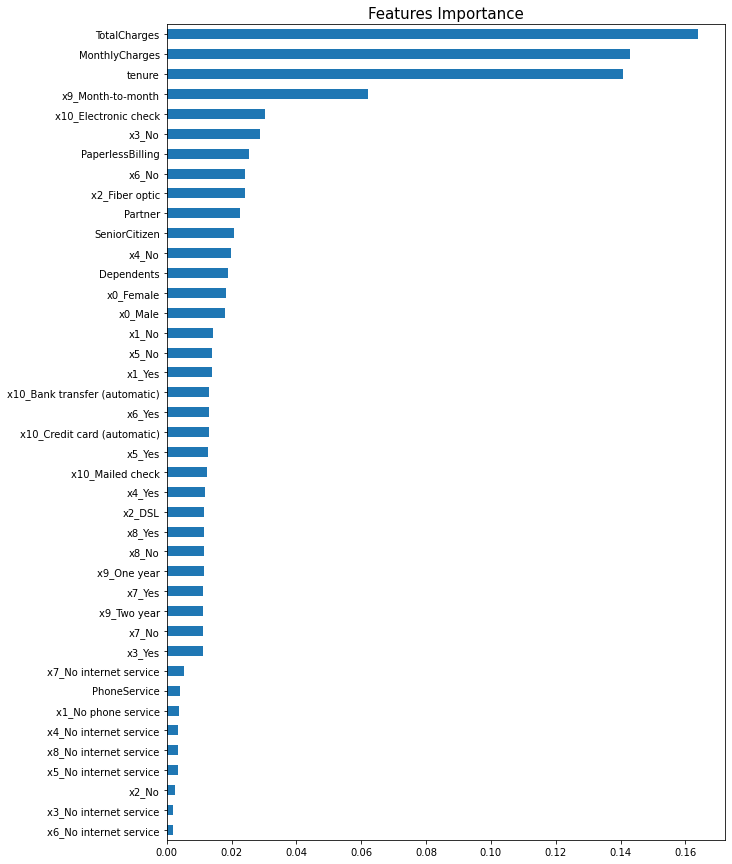

In [49]:
# visualisasi feature importance menggunakan bar plot horizontal
importance_table['imp'].sort_values().plot(kind = 'barh', figsize = (10,15))
plt.title('Features Importance', size = 15)
plt.show()

Dari hasil features importance diatas, kita dapat melihat bahwa fitur `TotalCharges`, `MonthlyCharges`, dan `tenure` merupakan tiga fitur yang paling berpengaruh dalam menentukan label `Churn`. Ketiga fitur ini dapat menjadi fokus utama tim terkait dalam memantau customer churn. Terdapat beberapa fitur yang memiliki bobot yang rendah dalam menentukan label, contohnya seperti nilai bobot importance dibawah 1% yang akan saya drop karena pengaruhnya yang sangat kecil dalam menentukan label. Fitur-fitur tersebut adalah sebagai berikut:

1. `x7_No internet service` : index no. 24
2. `PhoneService` : index no. 39
3. `x1_No phone service` : index no. 6
4. `x4_No internet service` : index no. 15
5. `x8_No internet service` : index no. 27
6. `x5_No internet service` : index no. 18
7. `x2_No` : index no. 10
8. `x3_No internet service` : index no. 12
9. `x6_No internet service` : index no. 21

9 fitur diatas akan saya drop sesuai dengan nomor indexnya pada array 1 dimensi data train-set.

In [50]:
# list nomor index yang akan di drop berdasarkan features importance
feat_imp_drop_col = [6, 10, 12, 15, 18, 21, 24, 27, 39]

In [51]:
# ukuran dimensi kolom data sebelum dilakukan drop features
X_train_final.shape[1]

41

In [52]:
# drop kolom berdasarkan features importances
X_train_final = np.delete(X_train_final, np.s_[feat_imp_drop_col], axis=1)
X_val_final = np.delete(X_val_final, np.s_[feat_imp_drop_col], axis=1)
X_test_final = np.delete(X_test_final, np.s_[feat_imp_drop_col], axis=1)

In [53]:
# ukuran dimensi kolom data setelah dilakukan drop features
X_train_final.shape[1]

32

Features selection telah berhasil dilakukan, kita telah menghapus 9 fitur yang tidak terlalu berpengaruh dalam menentukan label berdasarkan features importance random forest. Jumlah fitur yang akan digunakan untuk training model adalah 32 fitur.

### Data Pipeline Tensor Flow

Data pipeline tensor flow digunakan untuk melakukan validasi training model yang lebih kokoh daripada hanya melakukan training model secara lansung. Metode pipeline yang akan saya gunakan adalah shuffle, repeat, dan batch pada train-set.

In [54]:
# random seed tensorflow
tf.random.set_seed(7)

In [55]:
# data train
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)).shuffle(4493).repeat(2).batch(32)  # shuffle sebanyak jumlah baris data train

# data validation
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(32)

# data test
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(32)

Data untuk training model telah dilakukan pipeline sehingga hasil validasinya dapat lebih baik dan kokoh.

__________________________

# VI. Model Definition

Model machine learning neural network yang akan saya gunakan dalam proses modeling adalah sebagai berikut:
1. Basic model sequential API
2. Basic model functional API
3. Improve model sequential API dengan weight initializer He
4. Improve model sequential API dengan weight initializer Glorot
5. Improve model functional API dengan optimizers Adam
6. Improve model functional API dengan optimizers Adamax

Dari ke-6 model diatas saya akan memilih satu model terbaik yang akan digunakan dalam model deployment dan model inference. Metriks yang digunakan dalam training model adalah loss function 'binary_crossentropy' untuk melihat nilai loss dari hasil prediksi data dengan nilai data validasi, lalu metriks recall akan digunakan dalam menentukan model terbaik karena tujuan dalam pembuatan model ini adalah model yang dapat memprediksi False Negative sedikit mungkin, atau prediksi customer yang sebenarnya churn namun terprediksi tidak churn.

___________________________

# VII. Model Training and Evaluation

## Basic Model

### 1. Basic Model Sequential API

Pada basic model sequential ini saya akan menggunakan parameter default. Tujuannya adalah untuk melihat base model dari sequential API.

In [56]:
# model sequential
model_basic_seq = keras.models.Sequential()

# input layers
model_basic_seq.add(keras.layers.Dense(64, input_shape=(32,), name = 'input'))

# hidden layers 1
model_basic_seq.add(keras.layers.Dense(32, name = 'hidden_1'))

# hidden layers 2
model_basic_seq.add(keras.layers.Dense(16, name = 'hidden_2'))

# hidden layers 3
model_basic_seq.add(keras.layers.Dense(8, name = 'hidden_3'))

# output layers
model_basic_seq.add(keras.layers.Dense(1, name = 'output'))

In [57]:
# Compile model
model_basic_seq.compile(loss='binary_crossentropy',
                        metrics = ['accuracy'])

In [58]:
# summary model
model_basic_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                2112      
                                                                 
 hidden_1 (Dense)            (None, 32)                2080      
                                                                 
 hidden_2 (Dense)            (None, 16)                528       
                                                                 
 hidden_3 (Dense)            (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


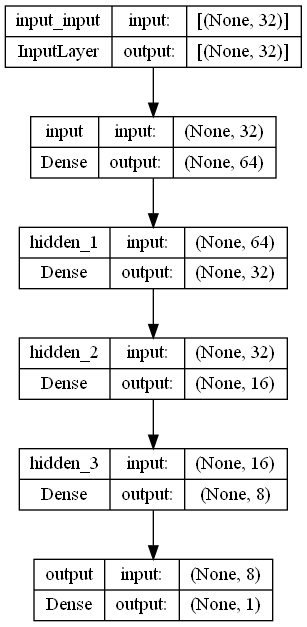

In [59]:
# visualisasi arsitektur model sequential 
keras.utils.plot_model(model_basic_seq, 'model_basic_seq.png', show_shapes=True)

In [60]:
# fit basic model sequential
history1 = model_basic_seq.fit(train_dataset,
                              epochs = 30,
                              validation_data = (val_dataset),
                              verbose = 1)

Epoch 1/30
281/281 [==============================] - 3s 5ms/step - loss: 2.1158 - accuracy: 0.7557 - val_loss: 0.8962 - val_accuracy: 0.7553
Epoch 2/30
281/281 [==============================] - 1s 3ms/step - loss: 0.6778 - accuracy: 0.7612 - val_loss: 0.5119 - val_accuracy: 0.7544
Epoch 3/30
281/281 [==============================] - 1s 3ms/step - loss: 0.5786 - accuracy: 0.7780 - val_loss: 0.7171 - val_accuracy: 0.7660
Epoch 4/30
281/281 [==============================] - 1s 3ms/step - loss: 0.5807 - accuracy: 0.7856 - val_loss: 0.5516 - val_accuracy: 0.7802
Epoch 5/30
281/281 [==============================] - 1s 3ms/step - loss: 0.5351 - accuracy: 0.7896 - val_loss: 0.5375 - val_accuracy: 0.7918
Epoch 6/30
281/281 [==============================] - 1s 4ms/step - loss: 0.5194 - accuracy: 0.7890 - val_loss: 0.5030 - val_accuracy: 0.7838
Epoch 7/30
281/281 [==============================] - 1s 3ms/step - loss: 0.5233 - accuracy: 0.7923 - val_loss: 0.5459 - val_accuracy: 0.7802
Epoch 

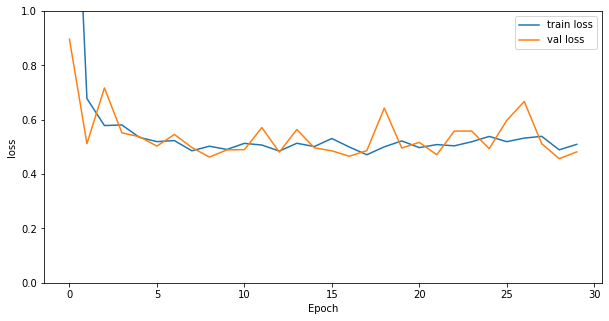

In [61]:
# visualisasi hasil training basic model sequential
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(history1.epoch[-1]+1),history1.history['loss'],label='train loss')
ax.plot(range(history1.epoch[-1]+1),history1.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.set_ylim([0,1])
plt.legend()
plt.show()

Terlihat dari hasil training basic model sequential diatas, model ini masih kurang baik dalam melakukan prediksi dengan nilai loss berada di kisaran 0,5 dengan kenaikan dan penurunan yang cukup berfluktuatif.

In [62]:
print('Minimum Validation Loss :', min(history1.history['val_loss']))

Minimum Validation Loss : 0.45662155747413635


In [63]:
# classification report
y_pred_val_seq = model_basic_seq.predict(X_val_final)
y_pred_val_seq = np.where(y_pred_val_seq > 0.5, 1, 0)
print(classification_report(y_val, y_pred_val_seq))

36/36 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       823
           1       0.61      0.57      0.59       301

    accuracy                           0.79      1124
   macro avg       0.73      0.72      0.72      1124
weighted avg       0.78      0.79      0.78      1124



Recall score model ini berada dikisaran 0,57 dengan akurasi skor dikisaran 0,79.

### 2. Basic Model - Functional API

Sama seperti basic model sequential, pada basic model functional API ini saya akan menggunakan parameter default. Tujuannya adalah untuk melihat base model dari functional API.

In [64]:
# input layers
input = keras.layers.Input(shape=[32], name='input')

# hidden layers 1
hidden_1 = keras.layers.Dense(64, name = 'hidden_1')(input)

# hidden layers 2
hidden_2 = keras.layers.Dense(32, name = 'hidden_2')(hidden_1)

# concatenate
concat = keras.layers.concatenate([input, hidden_2], name = 'concat')

# output layers
output = keras.layers.Dense(1, name='output')(concat)

# model functional API
model_basic_func = keras.models.Model(inputs=[input], outputs=[output])

In [65]:
# compile model
model_basic_func.compile(loss='binary_crossentropy',
                        metrics = 'accuracy')

In [66]:
# model summary
model_basic_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 32)]         0           []                               
                                                                                                  
 hidden_1 (Dense)               (None, 64)           2112        ['input[0][0]']                  
                                                                                                  
 hidden_2 (Dense)               (None, 32)           2080        ['hidden_1[0][0]']               
                                                                                                  
 concat (Concatenate)           (None, 64)           0           ['input[0][0]',                  
                                                                  'hidden_2[0][0]']           

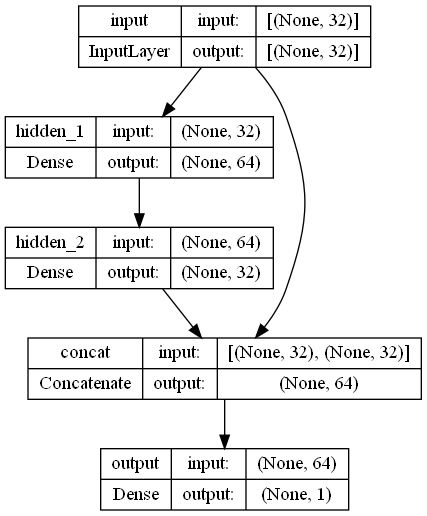

In [67]:
# visualisasi arsitektur basic model functional API
keras.utils.plot_model(model_basic_func, 'model_basic_func.png', show_shapes=True)

In [68]:
# training basic model functional API
history2 = model_basic_func.fit(train_dataset,
                              epochs = 30,
                              validation_data = (val_dataset),
                              verbose = 1)

Epoch 1/30
281/281 [==============================] - 2s 4ms/step - loss: 1.1233 - accuracy: 0.7603 - val_loss: 0.5577 - val_accuracy: 0.7722
Epoch 2/30
281/281 [==============================] - 1s 3ms/step - loss: 0.6166 - accuracy: 0.7695 - val_loss: 0.5251 - val_accuracy: 0.7117
Epoch 3/30
281/281 [==============================] - 1s 3ms/step - loss: 0.6245 - accuracy: 0.7812 - val_loss: 0.6790 - val_accuracy: 0.7536
Epoch 4/30
281/281 [==============================] - 1s 3ms/step - loss: 0.5878 - accuracy: 0.7809 - val_loss: 0.5415 - val_accuracy: 0.7883
Epoch 5/30
281/281 [==============================] - 1s 4ms/step - loss: 0.6199 - accuracy: 0.7853 - val_loss: 0.6283 - val_accuracy: 0.7820
Epoch 6/30
281/281 [==============================] - 1s 3ms/step - loss: 0.5901 - accuracy: 0.7872 - val_loss: 0.6090 - val_accuracy: 0.7954
Epoch 7/30
281/281 [==============================] - 1s 3ms/step - loss: 0.5728 - accuracy: 0.7896 - val_loss: 0.5866 - val_accuracy: 0.7820
Epoch 

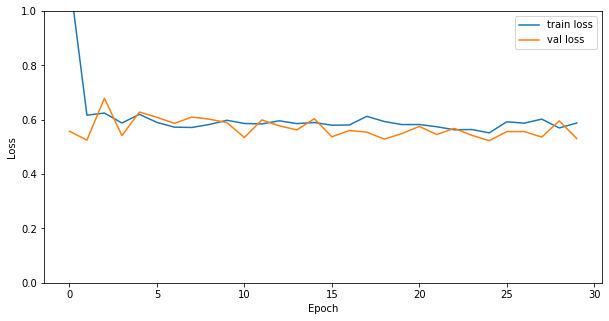

In [69]:
# visualiasi hasil training basic model functional API
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(history2.epoch[-1]+1),history2.history['loss'],label='train loss')
ax.plot(range(history2.epoch[-1]+1),history2.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_ylim([0,1])
plt.legend()
plt.show()

Hasil training basic model functional diatas menunjukan bahwa model ini tidak lebih bagus daripada basic model sequential. Nilai loss berada diatas dari model sebelumnya.

In [70]:
print('Minimum Validation Loss :', min(history2.history['val_loss']))

Minimum Validation Loss : 0.5227253437042236


In [71]:
# classification report
y_pred_val_func = model_basic_func.predict(X_val_final)
y_pred_val_func = np.where(y_pred_val_func > 0.5, 1, 0)
print(classification_report(y_val, y_pred_val_func))

36/36 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       823
           1       0.63      0.48      0.54       301

    accuracy                           0.79      1124
   macro avg       0.73      0.69      0.70      1124
weighted avg       0.77      0.79      0.78      1124



Hasil recall scorenya berada dikisaran 0,48.

## Improve Model

### 3. Improve Model Sequential API - Weight Initializers He

Pada bagian improve model ini, saya akan mulai menggunakan weight initializers, fungsi aktivasi, regularisasi, dan optimizer. Penggunaaan beberapa tambahan tersebut diharapkan membuat model lebih kompleks dan dapat memprediksi label lebih baik daripada basic model.

In [72]:
# model sequential
model_improve_seq = keras.models.Sequential()

# input layers
model_improve_seq.add(keras.layers.Dense(64, input_shape=(32,), kernel_initializer = keras.initializers.he_normal(), activation = 'relu', name = 'input'))

# hidden layers 1
model_improve_seq.add(keras.layers.Dense(32, kernel_regularizer = keras.regularizers.l2(), name = 'hidden_1'))
model_improve_seq.add(keras.layers.Activation('relu'))

# hidden layers 2
model_improve_seq.add(keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(), name = 'hidden_2'))
model_improve_seq.add(keras.layers.Activation('relu'))

# hidden layers 3
model_improve_seq.add(keras.layers.Dense(8, kernel_regularizer = keras.regularizers.l2(), name = 'hidden_3'))
model_improve_seq.add(keras.layers.Activation('relu'))

# output layers
model_improve_seq.add(keras.layers.Dense(1, activation='sigmoid'))

In [73]:
# compile model
model_improve_seq.compile(loss='binary_crossentropy',
                          optimizer = keras.optimizers.Adam(lr = 0.01),
                          metrics = ['accuracy'])

In [74]:
# model summary
model_improve_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                2112      
                                                                 
 hidden_1 (Dense)            (None, 32)                2080      
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 hidden_2 (Dense)            (None, 16)                528       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 hidden_3 (Dense)            (None, 8)                 136       
                                                                 
 activation_2 (Activation)   (None, 8)                

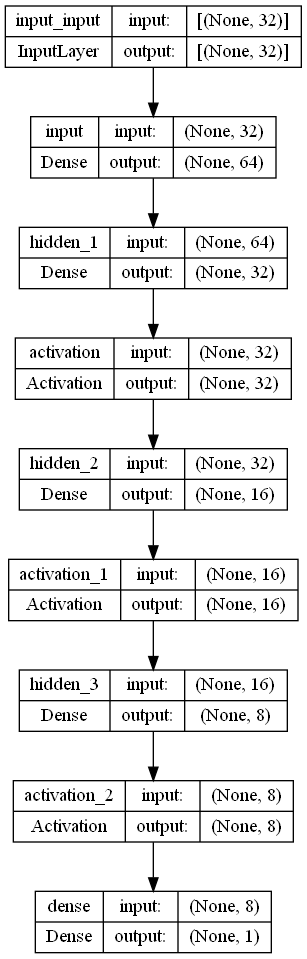

In [75]:
# visualiasi arsitektur improve model sequential
keras.utils.plot_model(model_improve_seq, 'model_improve_seq.png', show_shapes=True)

In [76]:
# early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights = True)

Callbacks early stopping digunakan untuk mempercepat proses training model karena model akan berhenti setelah tidak menemukan perubahan yang signifikan, sehingga proses training model dapat lebih cepat dengan hasil model tidak akan terlalu kompleks.

In [77]:
# training improve model sequential
history3 = model_improve_seq.fit(train_dataset,
                              epochs = 200,
                              validation_data = (val_dataset),
                              verbose = 1,
                              callbacks = [early_stop])

Epoch 1/200
281/281 [==============================] - 3s 4ms/step - loss: 0.5086 - accuracy: 0.7805 - val_loss: 0.4635 - val_accuracy: 0.7776
Epoch 2/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4506 - accuracy: 0.7931 - val_loss: 0.4519 - val_accuracy: 0.7909
Epoch 3/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4434 - accuracy: 0.7959 - val_loss: 0.4493 - val_accuracy: 0.7927
Epoch 4/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4350 - accuracy: 0.8035 - val_loss: 0.4495 - val_accuracy: 0.7874
Epoch 5/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4348 - accuracy: 0.8021 - val_loss: 0.4500 - val_accuracy: 0.7891
Epoch 6/200
281/281 [==============================] - 1s 4ms/step - loss: 0.4294 - accuracy: 0.8053 - val_loss: 0.4466 - val_accuracy: 0.7927
Epoch 7/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4293 - accuracy: 0.8043 - val_loss: 0.4521 - val_accuracy: 0.7891

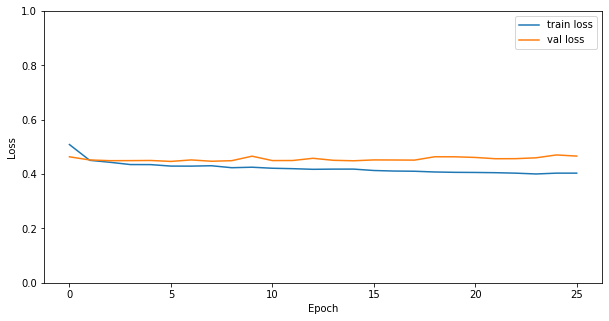

In [78]:
# visualisasi hasil training improve model sequential
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(history3.epoch[-1]+1),history3.history['loss'],label='train loss')
ax.plot(range(history3.epoch[-1]+1),history3.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_ylim([0,1])
plt.legend()
plt.show()

Hasil diatas menunjukan bahwa model cukup stabil dalam memprediksi label.

In [79]:
print('Minimum Validation Loss :', min(history3.history['val_loss']))

Minimum Validation Loss : 0.4465826749801636


In [80]:
# classification report
y_pred_val_seq2 = model_improve_seq.predict(X_val_final)
y_pred_val_seq2 = np.where(y_pred_val_seq2 > 0.5, 1, 0)
print(classification_report(y_val, y_pred_val_seq2))

36/36 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       823
           1       0.68      0.43      0.53       301

    accuracy                           0.79      1124
   macro avg       0.75      0.68      0.70      1124
weighted avg       0.78      0.79      0.78      1124



Recall score menunjukan dikisaran 0,43.

### 4. Improve Model Sequential API - Weight Initializers Glorot

Pada improve model sequential ini, saya akan menggunakan weight initializers yang berbeda dari sebelumnya yaitu menggunakan Glorot.

In [81]:
# model sequential
model_improve_seq2 = keras.models.Sequential()

# input layers
model_improve_seq2.add(keras.layers.Dense(64, input_shape=(32,), kernel_initializer = keras.initializers.GlorotNormal(), activation = 'tanh', name = 'input'))

# hidden layers 1
model_improve_seq2.add(keras.layers.Dense(32, kernel_regularizer = keras.regularizers.l2(), name = 'hidden_1'))
model_improve_seq2.add(keras.layers.Activation('relu'))

# hidden layers 2
model_improve_seq2.add(keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(), name = 'hidden_2'))
model_improve_seq2.add(keras.layers.Activation('relu'))

# hidden layers 3
model_improve_seq2.add(keras.layers.Dense(8, kernel_regularizer = keras.regularizers.l2(), name = 'hidden_3'))
model_improve_seq2.add(keras.layers.Activation('relu'))

# output layers
model_improve_seq2.add(keras.layers.Dense(1, activation='sigmoid'))

In [82]:
# compile model
model_improve_seq2.compile(loss='binary_crossentropy',
                          optimizer = keras.optimizers.Adam(lr = 0.01),
                          metrics = ['accuracy'])

In [83]:
# model summary
model_improve_seq2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 64)                2112      
                                                                 
 hidden_1 (Dense)            (None, 32)                2080      
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 hidden_2 (Dense)            (None, 16)                528       
                                                                 
 activation_4 (Activation)   (None, 16)                0         
                                                                 
 hidden_3 (Dense)            (None, 8)                 136       
                                                                 
 activation_5 (Activation)   (None, 8)                

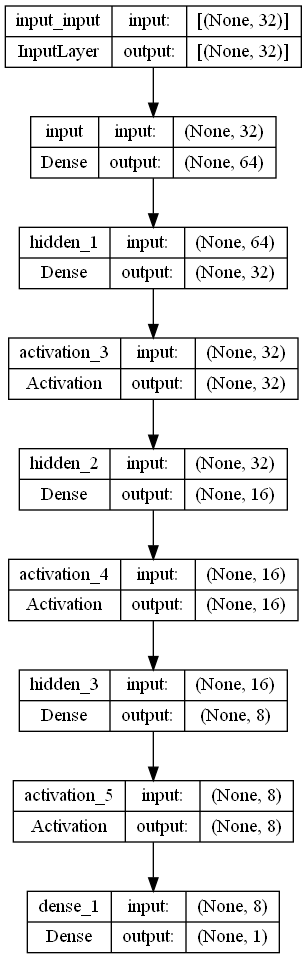

In [84]:
# visualiasi arsitektur improve model sequential 2
keras.utils.plot_model(model_improve_seq2, 'model_improve_seq2.png', show_shapes=True)

In [85]:
# training improve model sequential 2
history4 = model_improve_seq2.fit(train_dataset,
                              epochs = 200,
                              validation_data = (val_dataset),
                              verbose = 1,
                              callbacks = [early_stop])

Epoch 1/200
281/281 [==============================] - 3s 4ms/step - loss: 0.5080 - accuracy: 0.7814 - val_loss: 0.4692 - val_accuracy: 0.7820
Epoch 2/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4538 - accuracy: 0.7916 - val_loss: 0.4650 - val_accuracy: 0.7829
Epoch 3/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4518 - accuracy: 0.7927 - val_loss: 0.4543 - val_accuracy: 0.7847
Epoch 4/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4473 - accuracy: 0.7957 - val_loss: 0.4547 - val_accuracy: 0.7847
Epoch 5/200
281/281 [==============================] - 1s 4ms/step - loss: 0.4412 - accuracy: 0.7970 - val_loss: 0.4547 - val_accuracy: 0.7954
Epoch 6/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.7979 - val_loss: 0.4496 - val_accuracy: 0.7954
Epoch 7/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4379 - accuracy: 0.8005 - val_loss: 0.4507 - val_accuracy: 0.7891

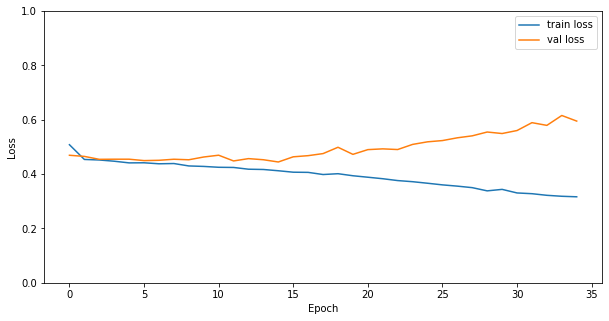

In [86]:
# visualisasi hasil training improve model sequential 2
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(history4.epoch[-1]+1),history4.history['loss'],label='train loss')
ax.plot(range(history4.epoch[-1]+1),history4.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_ylim([0,1])
plt.legend()
plt.show()

Hasil training improve model sequential 2 diatas menunjukan hasil yang semakin banyak epochnya maka semakin memburuk performa modelnya.

In [87]:
print('Minimum Validation Loss :', min(history4.history['val_loss']))

Minimum Validation Loss : 0.4445049464702606


In [88]:
y_pred_val_seq3 = model_improve_seq2.predict(X_val_final)
y_pred_val_seq3 = np.where(y_pred_val_seq3 > 0.5, 1, 0)
print(classification_report(y_val, y_pred_val_seq3))

36/36 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       823
           1       0.65      0.53      0.58       301

    accuracy                           0.80      1124
   macro avg       0.74      0.71      0.72      1124
weighted avg       0.79      0.80      0.79      1124



Recall score berada dikisaran 0,53.

### 5. Improve Model Functional API - Optimizers Adam

Pada improve model functional ini, saya akan menggunakan optimizers Adam pada compile model. Penggunaan fungsi aktivasi pun saya tambahkan pada beberapa layers guna memberikan tingkat kompleksitas model yang lebih tinggi.

In [89]:
# input layers
input = keras.layers.Input(shape=[32], name='input')

# hidden layers 1
hidden_1 = keras.layers.Dense(64, activation = 'relu', name = 'hidden_1')(input)

# hidden layers 2
hidden_2 = keras.layers.Dense(32, activation = 'relu', name = 'hidden_2')(hidden_1)

# concatenate
concat = keras.layers.concatenate([input, hidden_2], name = 'concat')

# output layers
output = keras.layers.Dense(1, activation = 'sigmoid', name='output')(concat)

# model functional API
model_improve_func = keras.models.Model(inputs=[input], outputs=[output])

In [90]:
# compile model
model_improve_func.compile(loss='binary_crossentropy',
                           optimizer = keras.optimizers.Adam(lr = 0.001),
                           metrics = 'accuracy')

In [91]:
# model summary
model_improve_func.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 32)]         0           []                               
                                                                                                  
 hidden_1 (Dense)               (None, 64)           2112        ['input[0][0]']                  
                                                                                                  
 hidden_2 (Dense)               (None, 32)           2080        ['hidden_1[0][0]']               
                                                                                                  
 concat (Concatenate)           (None, 64)           0           ['input[0][0]',                  
                                                                  'hidden_2[0][0]']         

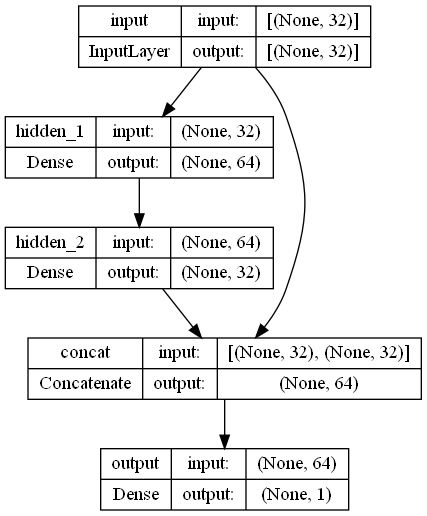

In [92]:
# visualisasi arstitektur improve model functional API
keras.utils.plot_model(model_improve_func, 'model_improve_func.png', show_shapes=True)

In [93]:
# early stopping
early_stop2 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights = True)

In [94]:
# training improve model functional API
history5 = model_improve_func.fit(train_dataset,
                              epochs = 200,
                              validation_data = (val_dataset),
                              callbacks = [early_stop2],
                              verbose = 1)

Epoch 1/200
281/281 [==============================] - 3s 5ms/step - loss: 0.4527 - accuracy: 0.7785 - val_loss: 0.4361 - val_accuracy: 0.7927
Epoch 2/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4199 - accuracy: 0.8050 - val_loss: 0.4422 - val_accuracy: 0.7785
Epoch 3/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8030 - val_loss: 0.4346 - val_accuracy: 0.7989
Epoch 4/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8087 - val_loss: 0.4373 - val_accuracy: 0.7963
Epoch 5/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4058 - accuracy: 0.8116 - val_loss: 0.4404 - val_accuracy: 0.7918
Epoch 6/200
281/281 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8125 - val_loss: 0.4395 - val_accuracy: 0.7945
Epoch 7/200
281/281 [==============================] - 1s 3ms/step - loss: 0.3956 - accuracy: 0.8164 - val_loss: 0.4428 - val_accuracy: 0.7998

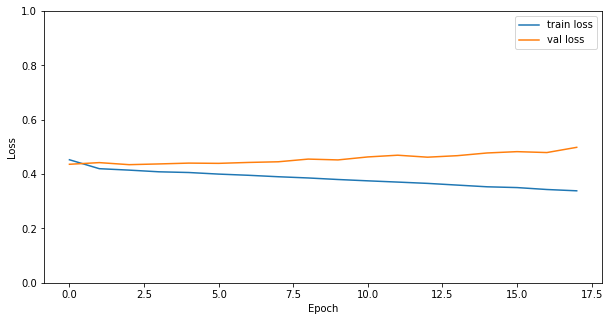

In [95]:
# visualisasi hasil training improve model functional API
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(history5.epoch[-1]+1),history5.history['loss'],label='train loss')
ax.plot(range(history5.epoch[-1]+1),history5.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_ylim([0,1])
plt.legend()
plt.show()

Hasil training improve model functional 1 diatas menunjukan hasil yang semakin banyak epochnya maka semakin memburuk performa modelnya.

In [96]:
print('Minimum Validation Loss :', min(history5.history['val_loss']))

Minimum Validation Loss : 0.43464261293411255


In [97]:
y_pred_val_func2 = model_improve_func.predict(X_val_final)
y_pred_val_func2 = np.where(y_pred_val_func2 > 0.5, 1, 0)
print(classification_report(y_val, y_pred_val_func2))

36/36 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       823
           1       0.66      0.50      0.57       301

    accuracy                           0.80      1124
   macro avg       0.75      0.71      0.72      1124
weighted avg       0.79      0.80      0.79      1124



Recall score berada dikisaran 0,50.

### 6. Improve Model Functional API - Optimizers Adamax

Pada model terakhir ini saya menggunakan optimizers yang berbeda dari sebelumnya yaitu Adamax.

In [98]:
# input layers
input = keras.layers.Input(shape=[32], name='input')

# hidden layers
hidden_1 = keras.layers.Dense(64, activation = 'relu', name = 'hidden_1')(input)

# hidden layers
hidden_2 = keras.layers.Dense(32, activation = 'relu', name = 'hidden_2')(hidden_1)

# concatenate
concat = keras.layers.concatenate([input, hidden_2], name = 'concat')

# output layers
output = keras.layers.Dense(1, activation = 'sigmoid', name='output')(concat)

# model functional API
model_improve_func2 = keras.models.Model(inputs=[input], outputs=[output])

In [99]:
# compile model
model_improve_func2.compile(loss='binary_crossentropy',
                           optimizer = keras.optimizers.Adamax(lr = 0.001),
                           metrics = 'accuracy')

In [100]:
# model summary
model_improve_func2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 32)]         0           []                               
                                                                                                  
 hidden_1 (Dense)               (None, 64)           2112        ['input[0][0]']                  
                                                                                                  
 hidden_2 (Dense)               (None, 32)           2080        ['hidden_1[0][0]']               
                                                                                                  
 concat (Concatenate)           (None, 64)           0           ['input[0][0]',                  
                                                                  'hidden_2[0][0]']         

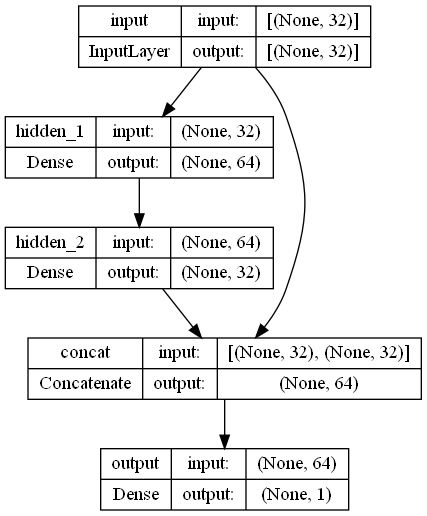

In [101]:
# visualisasi arstitektur improve model functional API 2
keras.utils.plot_model(model_improve_func2, 'model_improve_func2.png', show_shapes=True)

In [102]:
# training improve model functional API 2
history6 = model_improve_func2.fit(train_dataset,
                              epochs = 200,
                              validation_data = (val_dataset),
                              callbacks = [early_stop2],
                              verbose = 1)

Epoch 1/200
281/281 [==============================] - 2s 4ms/step - loss: 0.4746 - accuracy: 0.7613 - val_loss: 0.4410 - val_accuracy: 0.7927
Epoch 2/200
281/281 [==============================] - 1s 4ms/step - loss: 0.4271 - accuracy: 0.7941 - val_loss: 0.4352 - val_accuracy: 0.7900
Epoch 3/200
281/281 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.8000 - val_loss: 0.4332 - val_accuracy: 0.7936
Epoch 4/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.8020 - val_loss: 0.4321 - val_accuracy: 0.7909
Epoch 5/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.8029 - val_loss: 0.4333 - val_accuracy: 0.7883
Epoch 6/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4137 - accuracy: 0.8075 - val_loss: 0.4311 - val_accuracy: 0.7927
Epoch 7/200
281/281 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8071 - val_loss: 0.4333 - val_accuracy: 0.7963

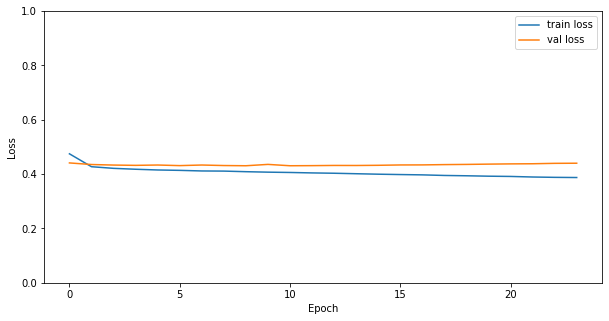

In [103]:
# visualisasi hasil training improve model functional API 2
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(history6.epoch[-1]+1),history6.history['loss'],label='train loss')
ax.plot(range(history6.epoch[-1]+1),history6.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_ylim([0,1])
plt.legend()
plt.show()

Hasil training improve model functional API 2 menunjukan hasil yang cukup baik.

In [104]:
print('Minimum Validation Loss :', min(history6.history['val_loss']))

Minimum Validation Loss : 0.4306475818157196


In [105]:
# classification report
y_pred_val_func3 = model_improve_func2.predict(X_val_final)
y_pred_val_func3 = np.where(y_pred_val_func3 > 0.5, 1, 0)
print(classification_report(y_val, y_pred_val_func3))

36/36 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       823
           1       0.65      0.52      0.58       301

    accuracy                           0.80      1124
   macro avg       0.74      0.71      0.72      1124
weighted avg       0.79      0.80      0.79      1124



Recall score berada dikisaran 0,52.

### Best Model

Untuk menentukan model terbaik, saya akan menyandingkan seluruh hasil training dan evaluation model yang telah dibuat.

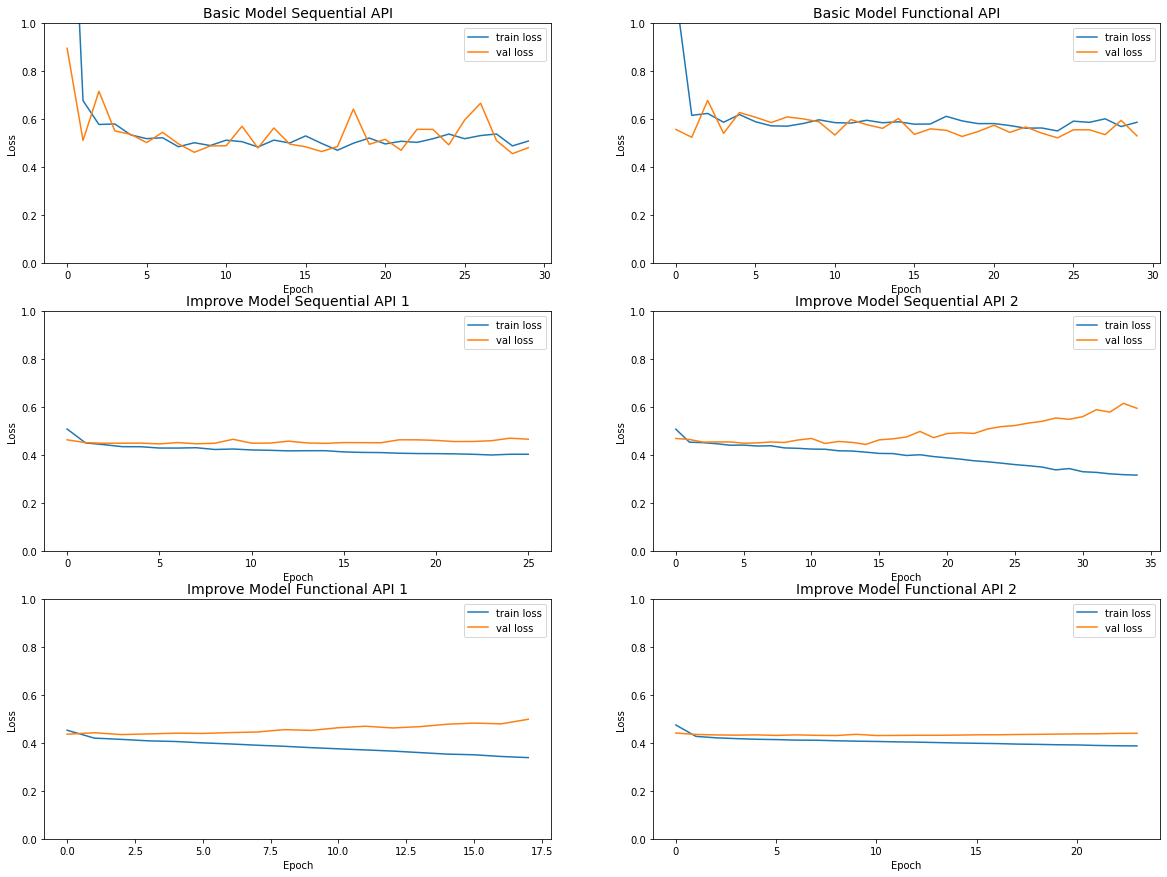

In [106]:
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize=(20,15))

ax[0][0].plot(range(history1.epoch[-1]+1),history1.history['loss'],label='train loss')
ax[0][0].plot(range(history1.epoch[-1]+1),history1.history['val_loss'],label='val loss')
ax[0][0].set_title('Basic Model Sequential API', size = 14)
ax[0][0].set_xlabel('Epoch')
ax[0][0].set_ylabel('Loss')
ax[0][0].set_ylim([0,1])
ax[0][0].legend()

ax[0][1].plot(range(history2.epoch[-1]+1),history2.history['loss'],label='train loss')
ax[0][1].plot(range(history2.epoch[-1]+1),history2.history['val_loss'],label='val loss')
ax[0][1].set_title('Basic Model Functional API', size = 14)
ax[0][1].set_xlabel('Epoch')
ax[0][1].set_ylabel('Loss')
ax[0][1].set_ylim([0,1])
ax[0][1].legend()

ax[1][0].plot(range(history3.epoch[-1]+1),history3.history['loss'],label='train loss')
ax[1][0].plot(range(history3.epoch[-1]+1),history3.history['val_loss'],label='val loss')
ax[1][0].set_title('Improve Model Sequential API 1', size = 14)
ax[1][0].set_xlabel('Epoch')
ax[1][0].set_ylabel('Loss')
ax[1][0].set_ylim([0,1])
ax[1][0].legend()

ax[1][1].plot(range(history4.epoch[-1]+1),history4.history['loss'],label='train loss')
ax[1][1].plot(range(history4.epoch[-1]+1),history4.history['val_loss'],label='val loss')
ax[1][1].set_title('Improve Model Sequential API 2', size = 14)
ax[1][1].set_xlabel('Epoch')
ax[1][1].set_ylabel('Loss')
ax[1][1].set_ylim([0,1])
ax[1][1].legend()

ax[2][0].plot(range(history5.epoch[-1]+1),history5.history['loss'],label='train loss')
ax[2][0].plot(range(history5.epoch[-1]+1),history5.history['val_loss'],label='val loss')
ax[2][0].set_title('Improve Model Functional API 1', size = 14)
ax[2][0].set_xlabel('Epoch')
ax[2][0].set_ylabel('Loss')
ax[2][0].set_ylim([0,1])
ax[2][0].legend()

ax[2][1].plot(range(history6.epoch[-1]+1),history6.history['loss'],label='train loss')
ax[2][1].plot(range(history6.epoch[-1]+1),history6.history['val_loss'],label='val loss')
ax[2][1].set_title('Improve Model Functional API 2', size = 14)
ax[2][1].set_xlabel('Epoch')
ax[2][1].set_ylabel('Loss')
ax[2][1].set_ylim([0,1])
ax[2][1].legend()

plt.show()

Dari hasil training model diatas, terlihat improve model sequential API 1 dan improve model functional API 2 merupakan model dengan hasil training yang paling stabil. Train loss dan val loss tidak jauh berbeda sehingga model tidak terlalu overfitting dibandingkan dengan hasil model lainnya yang berfluktuatif dan cenderung semakin menjauh antara nilai train loss dengan nilai val loss.

In [107]:
print('Minimum Validation Loss pada Basic Model Sequential API\t\t:', min(history1.history['val_loss']))
print('Minimum Validation Loss pada Basic Model Fucntional API\t\t:', min(history2.history['val_loss']))
print('Minimum Validation Loss pada Improve Model Sequential API 1\t:', min(history3.history['val_loss']))
print('Minimum Validation Loss pada Improve Model Sequential API 2\t:', min(history4.history['val_loss']))
print('Minimum Validation Loss pada Improve Model Functional API 1\t:', min(history5.history['val_loss']))
print('Minimum Validation Loss pada Improve Model Functional API 1\t:', min(history6.history['val_loss']))

Minimum Validation Loss pada Basic Model Sequential API		: 0.45662155747413635
Minimum Validation Loss pada Basic Model Fucntional API		: 0.5227253437042236
Minimum Validation Loss pada Improve Model Sequential API 1	: 0.4465826749801636
Minimum Validation Loss pada Improve Model Sequential API 2	: 0.4445049464702606
Minimum Validation Loss pada Improve Model Functional API 1	: 0.43464261293411255
Minimum Validation Loss pada Improve Model Functional API 1	: 0.4306475818157196


Nilai val loss terkecil terdapat pada improve model functional API 2.

In [108]:
# classification report model sequential
print('Basic Model Sequential\n',classification_report(y_val, y_pred_val_seq))
print('Improve Model Sequential 1\n',classification_report(y_val, y_pred_val_seq2))
print('Improve Model Sequential 2\n',classification_report(y_val, y_pred_val_seq3))

Basic Model Sequential
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       823
           1       0.61      0.57      0.59       301

    accuracy                           0.79      1124
   macro avg       0.73      0.72      0.72      1124
weighted avg       0.78      0.79      0.78      1124

Improve Model Sequential 1
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       823
           1       0.68      0.43      0.53       301

    accuracy                           0.79      1124
   macro avg       0.75      0.68      0.70      1124
weighted avg       0.78      0.79      0.78      1124

Improve Model Sequential 2
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       823
           1       0.65      0.53      0.58       301

    accuracy                           0.80      1124
   macro avg       0.74      0.71      0.72     

Pada model sequential API ini, model terbaik ada pada basic model dengan nilai recall score tertinggi.

In [109]:
# classification report model functional
print('Basic Model Functional\n',classification_report(y_val, y_pred_val_func))
print('improve Model Functional 1\n',classification_report(y_val, y_pred_val_func2))
print('improve Model Functional 2\n',classification_report(y_val, y_pred_val_func3))

Basic Model Functional
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       823
           1       0.63      0.48      0.54       301

    accuracy                           0.79      1124
   macro avg       0.73      0.69      0.70      1124
weighted avg       0.77      0.79      0.78      1124

improve Model Functional 1
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       823
           1       0.66      0.50      0.57       301

    accuracy                           0.80      1124
   macro avg       0.75      0.71      0.72      1124
weighted avg       0.79      0.80      0.79      1124

improve Model Functional 2
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       823
           1       0.65      0.52      0.58       301

    accuracy                           0.80      1124
   macro avg       0.74      0.71      0.72     

Pada model functional API ini, model terbaik ada pada improve model 2.

Dari keseluruhan model yang dibuat, model terbaik adalah improve model functional API 2 dengan hasil training yang paling stabil dan nilai recall score cukup tinggi walau bukan yang tertinggi. Sehingga untuk model deployment dan model inference, saya akan menggunakan model ini sebagai model yang akan memprediksi customer churn.

> Finalisasi model terbaik : `model_improve_func2`

### Model Predict Test-set

Model terbaik ini akan digunakan untuk memprediksi data test-set, hasil prediksi tersebut akan menjadi performa overall model ini dalam memprediksi sebuah dataset customer churn.

In [127]:
# model evaluation data test-set
model_improve_func2.evaluate(test_dataset)

44/44 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8149


[0.397682785987854, 0.8149465918540955]

In [132]:
# model predict data test-set
y_pred_test = model_improve_func2.predict(X_test_final)
y_pred_test = np.where(y_pred_test > 0.3, 1, 0)

44/44 [==============================] - 0s 2ms/step


Threshold yang saya gunakan adalah 0,3. Penurunan threshold ini diharapkan agar model dapat memprediksi False Negative yang lebih sedikit sehingga recall scorenya meningkat, karena fokus utama dalam pembuatan model ini adalah untuk menghasilkan nilai False Negative seminimal mungkin agar customer yang terprediksi tidak churn namun sebenaranya adalah churn (False Negative) akan semakin berkurang.

In [133]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1038
           1       0.58      0.77      0.66       367

    accuracy                           0.79      1405
   macro avg       0.74      0.79      0.76      1405
weighted avg       0.82      0.79      0.80      1405



Hasil classification report diatas menunjukan bahwa model ini dapat menghasilkan recall score 0,77. Hasil ini lebih baik karena threshold yang ditentukan sebelumnya 0,5 kita kurangi menjadi 0,3, model ini dapat dikatakan cukup baik dalam melakukan prediksi customer churn.

______________________

# VIII. Model Saving

Model terbaik selanjutnya disimpan dalam format h5 untuk keperluan model deployment. Pipeline data preprocessing juga akan saya simpan untuk keperluan model deployment.

In [134]:
# saving model
model_improve_func2.save('model_functional_api.h5')

In [135]:
# saving pipeline
with open('full_pipeline.pkl', 'wb') as file_1:
  pickle.dump(full_pipeline, file_1)

_____________

# IX. Model Inference

Pada model inference ini saya akan mencoba mengaplikasikan model yang sudah saya buat sebelumnya untuk memprediksi apakah customer akan churn atau tidak churn pada data inference yang telah saya pisahkan sebelumnya.

In [136]:
# preview data inference
df_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6901-GOGZG,Male,No,No,Yes,60,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,4984.85,No
1,7621-VPNET,Female,No,Yes,No,42,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),85.90,3729.75,No
2,8042-JVNFH,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.35,71.35,Yes
3,7402-PWYJJ,Female,No,Yes,No,53,Yes,Yes,Fiber optic,No,No,No,Yes,No,Yes,One year,Yes,Electronic check,91.15,4862.50,No
4,7873-CVMAW,Male,No,No,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.55,6362.35,No
5,6207-WIOLX,Female,No,Yes,Yes,25,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,Yes
6,6542-LWGXJ,Male,No,Yes,No,3,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.00,78.25,No
7,5574-NXZIU,Male,No,No,No,63,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),109.20,7049.75,No
8,1660-HSOOQ,Male,No,No,No,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.65,49.65,Yes
9,2065-MMKGR,Female,No,No,No,29,Yes,Yes,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),71.00,2080.10,No


Sebelum melakukan model inference, saya perlu melakukan tahapan data preprocessing agar data inference siap untuk diprediksi dengan menggunakan model. Proses data preprocessing akan melakukan proses yang sama seperti data preprocessing pada train-set dan test-set sebelumnya.

In [137]:
# split label dan fitur
X_inf = df_inf.drop(['customerID', 'Churn'], axis = 1)
y_inf = df_inf['Churn'].map({'Yes': 1, 'No': 0})

In [138]:
# replace value data kategorik binary
X_inf[cat_cols_bin] = X_inf[cat_cols_bin].replace({'Yes': 1, 'No': 0})

In [139]:
# Pipeline Data inference
X_inf_final = full_pipeline.transform(X_inf)

In [140]:
# drop fitur berdasarkan features importances
X_inf_final = np.delete(X_inf_final, np.s_[feat_imp_drop_col], axis=1)

Data inference telah berhasil di preprocessing, selanjutnya model dapat memprediksi label `Churn` dari data inference.

### Model Inference dengan Best Model

In [142]:
# model predict pada data inference
y_pred_inf = model_improve_func2.predict(X_inf_final)

1/1 [==============================] - 0s 42ms/step


In [143]:
# threshold 0.3
y_pred_inf = np.where(y_pred_inf > 0.3, 1, 0)

In [144]:
# hasil prediksi
y_pred_inf

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [145]:
# convert hasil prediksi model ke dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns = ['Churn - prediction'])
y_pred_inf_df

,Churn - prediction
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [146]:
# Merge dataframe inference dengan hasil prediksi model
pd.concat([df_inf, y_pred_inf_df], axis = 1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn - prediction
0,6901-GOGZG,Male,No,No,Yes,60,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,4984.85,No,0
1,7621-VPNET,Female,No,Yes,No,42,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),85.90,3729.75,No,0
2,8042-JVNFH,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.35,71.35,Yes,1
3,7402-PWYJJ,Female,No,Yes,No,53,Yes,Yes,Fiber optic,No,No,No,Yes,No,Yes,One year,Yes,Electronic check,91.15,4862.50,No,0
4,7873-CVMAW,Male,No,No,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.55,6362.35,No,0
5,6207-WIOLX,Female,No,Yes,Yes,25,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,Yes,0
6,6542-LWGXJ,Male,No,Yes,No,3,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.00,78.25,No,1
7,5574-NXZIU,Male,No,No,No,63,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),109.20,7049.75,No,0
8,1660-HSOOQ,Male,No,No,No,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.65,49.65,Yes,1
9,2065-MMKGR,Female,No,No,No,29,Yes,Yes,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),71.00,2080.10,No,0


In [147]:
# Perbandingan prediksi model dengan data sesungguhnya
pd.concat([df_inf, y_pred_inf_df], axis = 1)[['customerID', 'Churn', 'Churn - prediction']]

,customerID,Churn,Churn - prediction
0,6901-GOGZG,No,0
1,7621-VPNET,No,0
2,8042-JVNFH,Yes,1
3,7402-PWYJJ,No,0
4,7873-CVMAW,No,0
5,6207-WIOLX,Yes,0
6,6542-LWGXJ,No,1
7,5574-NXZIU,No,0
8,1660-HSOOQ,Yes,1
9,2065-MMKGR,No,0


In [148]:
# hasil classification report model knn pada data inference
print('Recall Skor Model KNN dalam memprediksi data inference:\n', classification_report(y_inf, y_pred_inf))

Recall Skor Model KNN dalam memprediksi data inference:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.67      0.67      0.67         3

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



Hasil model inference ini memperlihatkan bahwa model neural network yang telah kita buat ternyata menghasilkan recall score 0,67. Hasil ini masih dapat dikatakan kurang baik dan perlu dilakukan improvement lebih lanjut mengenai model ini. Diharapkan dengan adanya model yang dapat memprediksi customer churn ini, tim terkait dapat melakukan monitoring secara real-time dan dapat melakukan tindakan cepat dalam mencegah customer churn sebelum terlambat.

___________________

# X. Conclusion

Kesimpulan dari notebook ini adalah sebagai berikut:
1. Hasil EDA menunjukan bahwa churn rate dataset ini berada diangka 26,6%. EDA juga menemukan beberapa karakteristik customer churn pada perusahaan telco ini yaitu customer churn cenderung memiliki tipe internet service yaitu Fiber Optic, customer churn cenderung memiliki kontrak pembayaran perbulan, dan customer churn cenderung memiliki jumlah tagihan yang lebih tinggi daripada customer tidak churn.
2. Features importance random forest memperlihatkan 3 fitur yang sangat berpengaruh terhadap label `Churn` yaitu `TotalCharges`, `MonthlyCharges`, dan `tenure`.
3. Model neural network terbaik adalah model improve Functional API dengan Optimizers Adamax yang menghasilkan training model yang stabil dan recall score cukup tinggi.
4. Hasil model inference menunjukan model mendapatkan recall score 0,67. Hasil ini dapat dikatakan kurang baik dan model ini masih perlu dilakukan improvement dimasa yang akan datang.